<a href="https://colab.research.google.com/github/anikashaji/CODSOFT/blob/main/IRIS_Flower_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DATA LOADING**

In [1]:
import pandas as pd
df = pd.read_csv('/content/IRIS.csv')
df.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

**COUNTING THE TARGET VARIABLE**

In [5]:
df['species'].value_counts()

,count
species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


# **Data Preprocessing**

**CHECKING FOR NULLS**

In [7]:
df.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


**CHECKING FOR DATATYPES**

In [8]:
df.dtypes

,0
sepal_length,float64
sepal_width,float64
petal_length,float64
petal_width,float64
species,object


**CONVERTING THE TARGET TO CATEGORICAL VALUES- USING LABEL ENCODER**

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])

In [ ]:
df = df.drop(['species'],axis=1)
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# **Exploratory Data Analysis**

<Axes: >

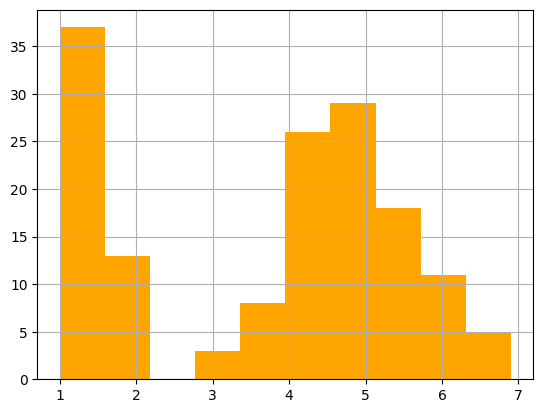

In [10]:
df['petal_length'].hist(color="orange")

<Axes: >

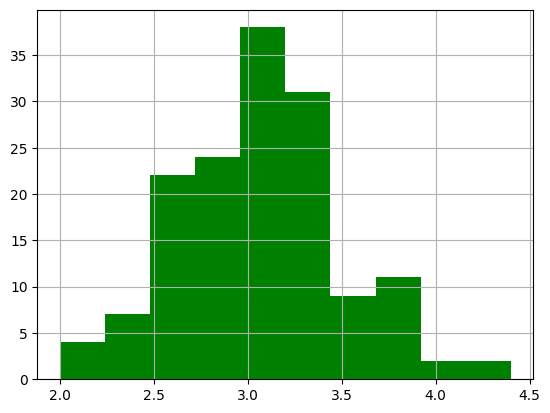

In [11]:
df['sepal_width'].hist(color="green")

<Axes: >

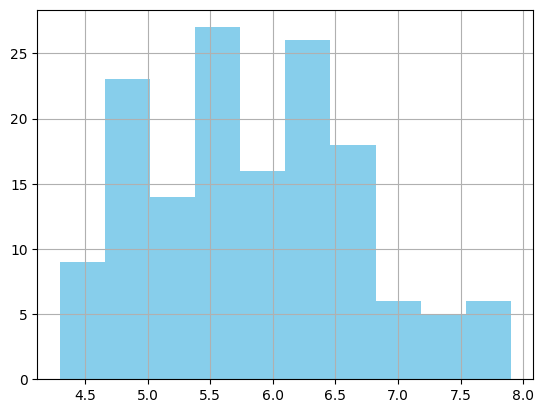

In [12]:
df['sepal_length'].hist(color="skyblue")

<Axes: >

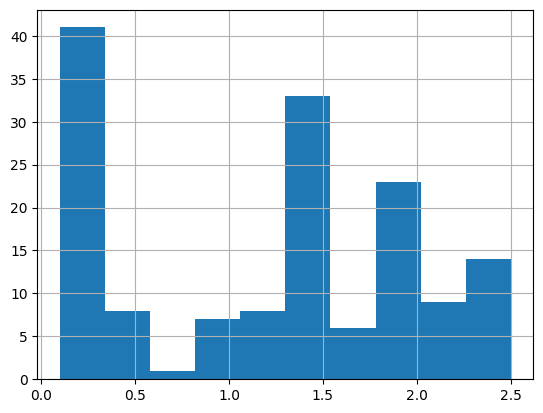

In [13]:
df['petal_width'].hist()

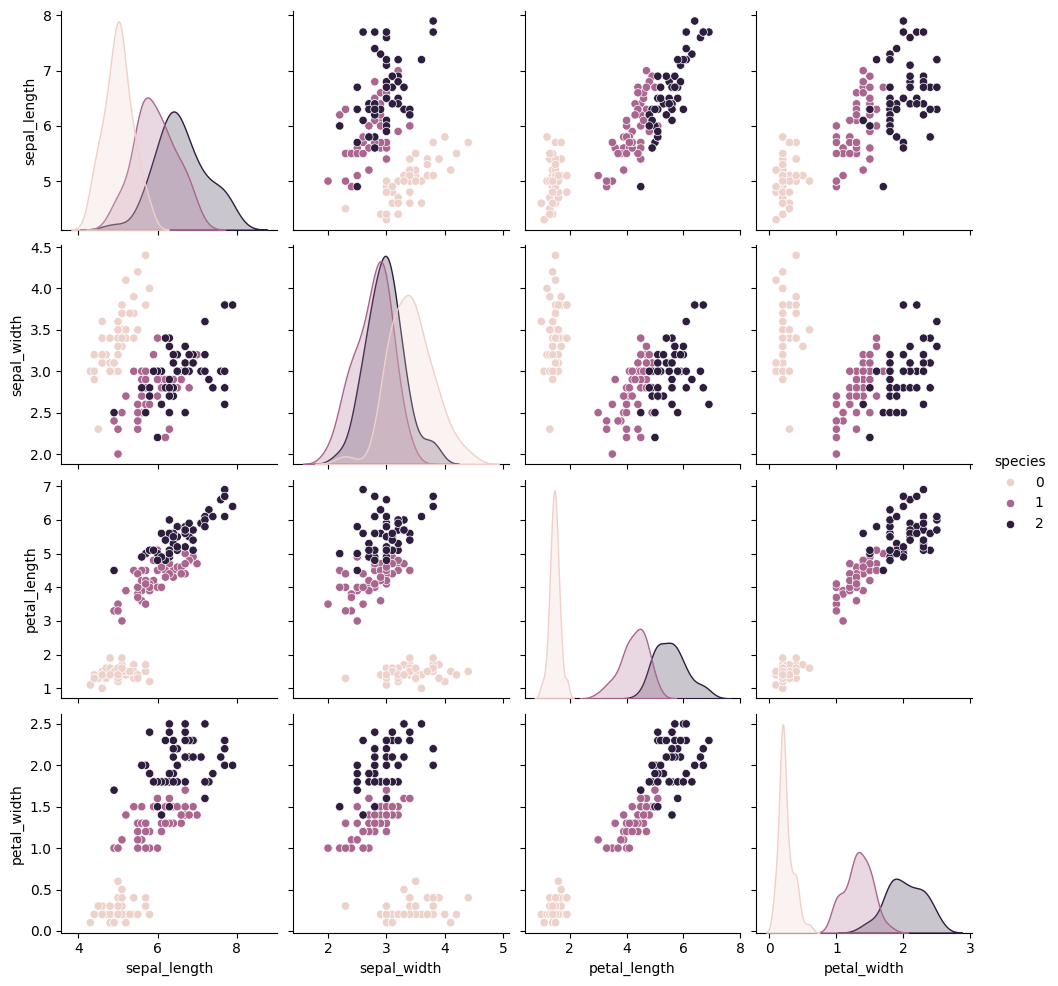

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df,hue='species')
plt.show()

In [16]:
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df['species']

**SPLITTING TO TRAIN AND TEST DATA**

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=42)


**DECISION TREE CLASSIFICATION MODEL**

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



**PREDICTION **

In [19]:
dtc.predict([[5.1,3.5,1.4,0.2]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

**LOGISTIC REGRESSION - CLASSIFICATION MODEL**

In [20]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
#print metric to get performance
print("Accuracy:",lr.score(X_test,y_test))


Accuracy: 1.0


In [21]:
lr.predict([[5.1,3.5,1.4,0.2]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

**KNN MODEL CLASSIFICATION**

In [23]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train,y_train)
#print metric to get performance
print("Accuracy:",model.score(X_test,y_test))

Accuracy: 1.0


In [24]:
model.predict([[5.1,3.5,1.4,0.2]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0])